# AsianPaints Stock Price Forecasting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


# importing dataset from database

In [2]:
df = pd.read_csv("G:\\My Drive\\ExcelR\\ASIANPAINT.csv")
df

Date      Symbol Series  Prev Close    Open     High      Low  \
0     2000-01-03  ASIANPAINT     EQ      361.20   370.0   390.00   370.00   
1     2000-01-04  ASIANPAINT     EQ      381.65   380.0   392.00   375.00   
2     2000-01-05  ASIANPAINT     EQ      385.55   371.5   390.00   371.50   
3     2000-01-06  ASIANPAINT     EQ      383.00   384.9   384.90   374.50   
4     2000-01-07  ASIANPAINT     EQ      377.50   376.0   390.00   370.00   
...          ...         ...    ...         ...     ...      ...      ...   
5301  2021-04-26  ASIANPAINT     EQ     2517.95  2530.0  2575.00  2530.00   
5302  2021-04-27  ASIANPAINT     EQ     2557.90  2545.0  2579.90  2534.00   
5303  2021-04-28  ASIANPAINT     EQ     2574.35  2588.0  2620.25  2575.00   
5304  2021-04-29  ASIANPAINT     EQ     2614.55  2630.0  2642.00  2570.00   
5305  2021-04-30  ASIANPAINT     EQ     2613.45  2595.0  2605.80  2524.05   

        Last    Close     VWAP   Volume      Turnover   Trades  \
0      385.0   381.65   380.54     3318  1.262617e+11      NaN   
1      390.0   385.55   383.50     4818  1.847699e+11      NaN   
2      383.0   383.00   379.81     2628  9.981384e+10      NaN   
3      375.1   377.50   379.88     3354  1.274114e+11      NaN   
4      389.0   385.70   383.38     9589  3.676275e+11      NaN   
...      ...      ...      ...      ...           ...      ...   
5301  2558.0  2557.90  2557.47  1103980  2.823400e+14  58557.0   
5302  2571.0  2574.35  2560.55   866331  2.218288e+14  66988.0   
5303  2612.0  2614.55  2605.91  1065561  2.776752e+14  52622.0   
5304  2613.0  2613.45  2607.33  1295346  3.377394e+14  64039.0   
5305  2529.0  2536.40  2558.66  1384907  3.543512e+14  91934.0   

      Deliverable Volume  %Deliverble  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
5301            335232.0       0.3037  
5302            281178.0       0.3246  
5303            449241.0       0.4216  
5304            447979.0       0.3458  
5305            750496.0       0.5419  

[5306 rows x 15 columns]

# Convert Date column to datetime

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df

Date      Symbol Series  Prev Close    Open     High      Low  \
0    2000-01-03  ASIANPAINT     EQ      361.20   370.0   390.00   370.00   
1    2000-01-04  ASIANPAINT     EQ      381.65   380.0   392.00   375.00   
2    2000-01-05  ASIANPAINT     EQ      385.55   371.5   390.00   371.50   
3    2000-01-06  ASIANPAINT     EQ      383.00   384.9   384.90   374.50   
4    2000-01-07  ASIANPAINT     EQ      377.50   376.0   390.00   370.00   
...         ...         ...    ...         ...     ...      ...      ...   
5301 2021-04-26  ASIANPAINT     EQ     2517.95  2530.0  2575.00  2530.00   
5302 2021-04-27  ASIANPAINT     EQ     2557.90  2545.0  2579.90  2534.00   
5303 2021-04-28  ASIANPAINT     EQ     2574.35  2588.0  2620.25  2575.00   
5304 2021-04-29  ASIANPAINT     EQ     2614.55  2630.0  2642.00  2570.00   
5305 2021-04-30  ASIANPAINT     EQ     2613.45  2595.0  2605.80  2524.05   

        Last    Close     VWAP   Volume      Turnover   Trades  \
0      385.0   381.65   380.54     3318  1.262617e+11      NaN   
1      390.0   385.55   383.50     4818  1.847699e+11      NaN   
2      383.0   383.00   379.81     2628  9.981384e+10      NaN   
3      375.1   377.50   379.88     3354  1.274114e+11      NaN   
4      389.0   385.70   383.38     9589  3.676275e+11      NaN   
...      ...      ...      ...      ...           ...      ...   
5301  2558.0  2557.90  2557.47  1103980  2.823400e+14  58557.0   
5302  2571.0  2574.35  2560.55   866331  2.218288e+14  66988.0   
5303  2612.0  2614.55  2605.91  1065561  2.776752e+14  52622.0   
5304  2613.0  2613.45  2607.33  1295346  3.377394e+14  64039.0   
5305  2529.0  2536.40  2558.66  1384907  3.543512e+14  91934.0   

      Deliverable Volume  %Deliverble  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
5301            335232.0       0.3037  
5302            281178.0       0.3246  
5303            449241.0       0.4216  
5304            447979.0       0.3458  
5305            750496.0       0.5419  

[5306 rows x 15 columns]

# converting Date Column into Index

In [4]:
df.set_index('Date', inplace=True)
df 

Symbol Series  Prev Close    Open     High      Low    Last  \
Date                                                                          
2000-01-03  ASIANPAINT     EQ      361.20   370.0   390.00   370.00   385.0   
2000-01-04  ASIANPAINT     EQ      381.65   380.0   392.00   375.00   390.0   
2000-01-05  ASIANPAINT     EQ      385.55   371.5   390.00   371.50   383.0   
2000-01-06  ASIANPAINT     EQ      383.00   384.9   384.90   374.50   375.1   
2000-01-07  ASIANPAINT     EQ      377.50   376.0   390.00   370.00   389.0   
...                ...    ...         ...     ...      ...      ...     ...   
2021-04-26  ASIANPAINT     EQ     2517.95  2530.0  2575.00  2530.00  2558.0   
2021-04-27  ASIANPAINT     EQ     2557.90  2545.0  2579.90  2534.00  2571.0   
2021-04-28  ASIANPAINT     EQ     2574.35  2588.0  2620.25  2575.00  2612.0   
2021-04-29  ASIANPAINT     EQ     2614.55  2630.0  2642.00  2570.00  2613.0   
2021-04-30  ASIANPAINT     EQ     2613.45  2595.0  2605.80  2524.05  2529.0   

              Close     VWAP   Volume      Turnover   Trades  \
Date                                                           
2000-01-03   381.65   380.54     3318  1.262617e+11      NaN   
2000-01-04   385.55   383.50     4818  1.847699e+11      NaN   
2000-01-05   383.00   379.81     2628  9.981384e+10      NaN   
2000-01-06   377.50   379.88     3354  1.274114e+11      NaN   
2000-01-07   385.70   383.38     9589  3.676275e+11      NaN   
...             ...      ...      ...           ...      ...   
2021-04-26  2557.90  2557.47  1103980  2.823400e+14  58557.0   
2021-04-27  2574.35  2560.55   866331  2.218288e+14  66988.0   
2021-04-28  2614.55  2605.91  1065561  2.776752e+14  52622.0   
2021-04-29  2613.45  2607.33  1295346  3.377394e+14  64039.0   
2021-04-30  2536.40  2558.66  1384907  3.543512e+14  91934.0   

            Deliverable Volume  %Deliverble  
Date                                         
2000-01-03                 NaN          NaN  
2000-01-04                 NaN          NaN  
2000-01-05                 NaN          NaN  
2000-01-06                 NaN          NaN  
2000-01-07                 NaN          NaN  
...                        ...          ...  
2021-04-26            335232.0       0.3037  
2021-04-27            281178.0       0.3246  
2021-04-28            449241.0       0.4216  
2021-04-29            447979.0       0.3458  
2021-04-30            750496.0       0.5419  

[5306 rows x 14 columns]

# performing 1. EDA

In [5]:
df.head()


Symbol Series  Prev Close   Open   High    Low   Last   Close  \
Date                                                                            
2000-01-03  ASIANPAINT     EQ      361.20  370.0  390.0  370.0  385.0  381.65   
2000-01-04  ASIANPAINT     EQ      381.65  380.0  392.0  375.0  390.0  385.55   
2000-01-05  ASIANPAINT     EQ      385.55  371.5  390.0  371.5  383.0  383.00   
2000-01-06  ASIANPAINT     EQ      383.00  384.9  384.9  374.5  375.1  377.50   
2000-01-07  ASIANPAINT     EQ      377.50  376.0  390.0  370.0  389.0  385.70   

              VWAP  Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                   
2000-01-03  380.54    3318  1.262617e+11     NaN                 NaN   
2000-01-04  383.50    4818  1.847699e+11     NaN                 NaN   
2000-01-05  379.81    2628  9.981384e+10     NaN                 NaN   
2000-01-06  379.88    3354  1.274114e+11     NaN                 NaN   
2000-01-07  383.38    9589  3.676275e+11     NaN                 NaN   

            %Deliverble  
Date                     
2000-01-03          NaN  
2000-01-04          NaN  
2000-01-05          NaN  
2000-01-06          NaN  
2000-01-07          NaN

# the above data displaying the first five Rows of the dataset

In [6]:
df.tail()


Symbol Series  Prev Close    Open     High      Low    Last  \
Date                                                                          
2021-04-26  ASIANPAINT     EQ     2517.95  2530.0  2575.00  2530.00  2558.0   
2021-04-27  ASIANPAINT     EQ     2557.90  2545.0  2579.90  2534.00  2571.0   
2021-04-28  ASIANPAINT     EQ     2574.35  2588.0  2620.25  2575.00  2612.0   
2021-04-29  ASIANPAINT     EQ     2614.55  2630.0  2642.00  2570.00  2613.0   
2021-04-30  ASIANPAINT     EQ     2613.45  2595.0  2605.80  2524.05  2529.0   

              Close     VWAP   Volume      Turnover   Trades  \
Date                                                           
2021-04-26  2557.90  2557.47  1103980  2.823400e+14  58557.0   
2021-04-27  2574.35  2560.55   866331  2.218288e+14  66988.0   
2021-04-28  2614.55  2605.91  1065561  2.776752e+14  52622.0   
2021-04-29  2613.45  2607.33  1295346  3.377394e+14  64039.0   
2021-04-30  2536.40  2558.66  1384907  3.543512e+14  91934.0   

            Deliverable Volume  %Deliverble  
Date                                         
2021-04-26            335232.0       0.3037  
2021-04-27            281178.0       0.3246  
2021-04-28            449241.0       0.4216  
2021-04-29            447979.0       0.3458  
2021-04-30            750496.0       0.5419

# the above data displaying the last five Rows of the dataset

In [7]:
df.shape


(5306, 14)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume              5306 non-null   int64  
 10  Turnover            5306 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4797 non-null   float64
 13  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 621.8+ KB


# a. Describing the dataset

In [9]:
df.describe()


Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1247.000952  1247.683952  1264.625349  1230.900697  1247.317132   
std    1074.399506  1074.025577  1087.238871  1062.629409  1074.432667   
min     210.750000   210.000000   215.750000   204.000000   210.600000   
25%     415.737500   415.000000   424.950000   410.000000   416.000000   
50%     889.375000   890.000000   903.975000   878.075000   890.000000   
75%    1599.037500  1599.800000  1629.675000  1573.037500  1602.500000   
max    5213.100000  5221.100000  5247.750000  5150.050000  5221.100000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean   1247.410903  1247.799926  5.096721e+05  6.942919e+13   41346.011401   
std    1074.476439  1075.057438  8.535993e+05  1.443973e+14   36435.449733   
min     210.750000   212.220000  2.500000e+01  1.278415e+09      70.000000   
25%     416.262500   415.692500  1.370750e+04  7.538133e+11   16264.750000   
50%     889.475000   888.350000  5.713600e+04  1.109437e+13   32402.500000   
75%    1600.762500  1600.982500  8.077905e+05  7.761479e+13   54727.500000   
max    5213.100000  5175.790000  1.154594e+07  2.216650e+15  351347.000000   

       Deliverable Volume  %Deliverble  
count        4.797000e+03  4797.000000  
mean         2.751281e+05     0.625572  
std          4.157465e+05     0.187597  
min          2.500000e+01     0.076800  
25%          1.262200e+04     0.486200  
50%          5.273800e+04     0.616100  
75%          4.383750e+05     0.765500  
max          7.938427e+06     1.000000

#  b. Cleaning the data

# Assuming 'symbol' and 'series' are not needed, Because two columns contains the same info through out the dataset

In [10]:
df.drop(['Symbol', 'Series'], axis=1, inplace=True)
df


Prev Close    Open     High      Low    Last    Close     VWAP  \
Date                                                                         
2000-01-03      361.20   370.0   390.00   370.00   385.0   381.65   380.54   
2000-01-04      381.65   380.0   392.00   375.00   390.0   385.55   383.50   
2000-01-05      385.55   371.5   390.00   371.50   383.0   383.00   379.81   
2000-01-06      383.00   384.9   384.90   374.50   375.1   377.50   379.88   
2000-01-07      377.50   376.0   390.00   370.00   389.0   385.70   383.38   
...                ...     ...      ...      ...     ...      ...      ...   
2021-04-26     2517.95  2530.0  2575.00  2530.00  2558.0  2557.90  2557.47   
2021-04-27     2557.90  2545.0  2579.90  2534.00  2571.0  2574.35  2560.55   
2021-04-28     2574.35  2588.0  2620.25  2575.00  2612.0  2614.55  2605.91   
2021-04-29     2614.55  2630.0  2642.00  2570.00  2613.0  2613.45  2607.33   
2021-04-30     2613.45  2595.0  2605.80  2524.05  2529.0  2536.40  2558.66   

             Volume      Turnover   Trades  Deliverable Volume  %Deliverble  
Date                                                                         
2000-01-03     3318  1.262617e+11      NaN                 NaN          NaN  
2000-01-04     4818  1.847699e+11      NaN                 NaN          NaN  
2000-01-05     2628  9.981384e+10      NaN                 NaN          NaN  
2000-01-06     3354  1.274114e+11      NaN                 NaN          NaN  
2000-01-07     9589  3.676275e+11      NaN                 NaN          NaN  
...             ...           ...      ...                 ...          ...  
2021-04-26  1103980  2.823400e+14  58557.0            335232.0       0.3037  
2021-04-27   866331  2.218288e+14  66988.0            281178.0       0.3246  
2021-04-28  1065561  2.776752e+14  52622.0            449241.0       0.4216  
2021-04-29  1295346  3.377394e+14  64039.0            447979.0       0.3458  
2021-04-30  1384907  3.543512e+14  91934.0            750496.0       0.5419  

[5306 rows x 12 columns]

# c. Checking invalid records 

In [11]:
df.isnull()


Prev Close   Open   High    Low   Last  Close   VWAP  Volume  \
Date                                                                       
2000-01-03       False  False  False  False  False  False  False   False   
2000-01-04       False  False  False  False  False  False  False   False   
2000-01-05       False  False  False  False  False  False  False   False   
2000-01-06       False  False  False  False  False  False  False   False   
2000-01-07       False  False  False  False  False  False  False   False   
...                ...    ...    ...    ...    ...    ...    ...     ...   
2021-04-26       False  False  False  False  False  False  False   False   
2021-04-27       False  False  False  False  False  False  False   False   
2021-04-28       False  False  False  False  False  False  False   False   
2021-04-29       False  False  False  False  False  False  False   False   
2021-04-30       False  False  False  False  False  False  False   False   

            Turnover  Trades  Deliverable Volume  %Deliverble  
Date                                                           
2000-01-03     False    True                True         True  
2000-01-04     False    True                True         True  
2000-01-05     False    True                True         True  
2000-01-06     False    True                True         True  
2000-01-07     False    True                True         True  
...              ...     ...                 ...          ...  
2021-04-26     False   False               False        False  
2021-04-27     False   False               False        False  
2021-04-28     False   False               False        False  
2021-04-29     False   False               False        False  
2021-04-30     False   False               False        False  

[5306 rows x 12 columns]

# d. Missing value detection and imputation

In [12]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64


# Replacing the null values

In [13]:
df['Trades'].fillna(df['Trades'].mean(), inplace=True)
df['Deliverable Volume'].fillna(df['Deliverable Volume'].mean(), inplace=True)
df['%Deliverble'].fillna(df['%Deliverble'].mean(), inplace=True)
df.to_csv('modified_file.csv', index=False)
df

Prev Close    Open     High      Low    Last    Close     VWAP  \
Date                                                                         
2000-01-03      361.20   370.0   390.00   370.00   385.0   381.65   380.54   
2000-01-04      381.65   380.0   392.00   375.00   390.0   385.55   383.50   
2000-01-05      385.55   371.5   390.00   371.50   383.0   383.00   379.81   
2000-01-06      383.00   384.9   384.90   374.50   375.1   377.50   379.88   
2000-01-07      377.50   376.0   390.00   370.00   389.0   385.70   383.38   
...                ...     ...      ...      ...     ...      ...      ...   
2021-04-26     2517.95  2530.0  2575.00  2530.00  2558.0  2557.90  2557.47   
2021-04-27     2557.90  2545.0  2579.90  2534.00  2571.0  2574.35  2560.55   
2021-04-28     2574.35  2588.0  2620.25  2575.00  2612.0  2614.55  2605.91   
2021-04-29     2614.55  2630.0  2642.00  2570.00  2613.0  2613.45  2607.33   
2021-04-30     2613.45  2595.0  2605.80  2524.05  2529.0  2536.40  2558.66   

             Volume      Turnover        Trades  Deliverable Volume  \
Date                                                                  
2000-01-03     3318  1.262617e+11  41346.011401       275128.103398   
2000-01-04     4818  1.847699e+11  41346.011401       275128.103398   
2000-01-05     2628  9.981384e+10  41346.011401       275128.103398   
2000-01-06     3354  1.274114e+11  41346.011401       275128.103398   
2000-01-07     9589  3.676275e+11  41346.011401       275128.103398   
...             ...           ...           ...                 ...   
2021-04-26  1103980  2.823400e+14  58557.000000       335232.000000   
2021-04-27   866331  2.218288e+14  66988.000000       281178.000000   
2021-04-28  1065561  2.776752e+14  52622.000000       449241.000000   
2021-04-29  1295346  3.377394e+14  64039.000000       447979.000000   
2021-04-30  1384907  3.543512e+14  91934.000000       750496.000000   

            %Deliverble  
Date                     
2000-01-03     0.625572  
2000-01-04     0.625572  
2000-01-05     0.625572  
2000-01-06     0.625572  
2000-01-07     0.625572  
...                 ...  
2021-04-26     0.303700  
2021-04-27     0.324600  
2021-04-28     0.421600  
2021-04-29     0.345800  
2021-04-30     0.541900  

[5306 rows x 12 columns]

In [14]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


# e. Duplicated records

In [15]:
duplicate_records = df[df.duplicated()]
print("Duplicate records:", duplicate_records)


Duplicate records: Empty DataFrame
Columns: [Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, %Deliverble]
Index: []


# f. Outliers

In [16]:
# We used boxplot method to detect outliers

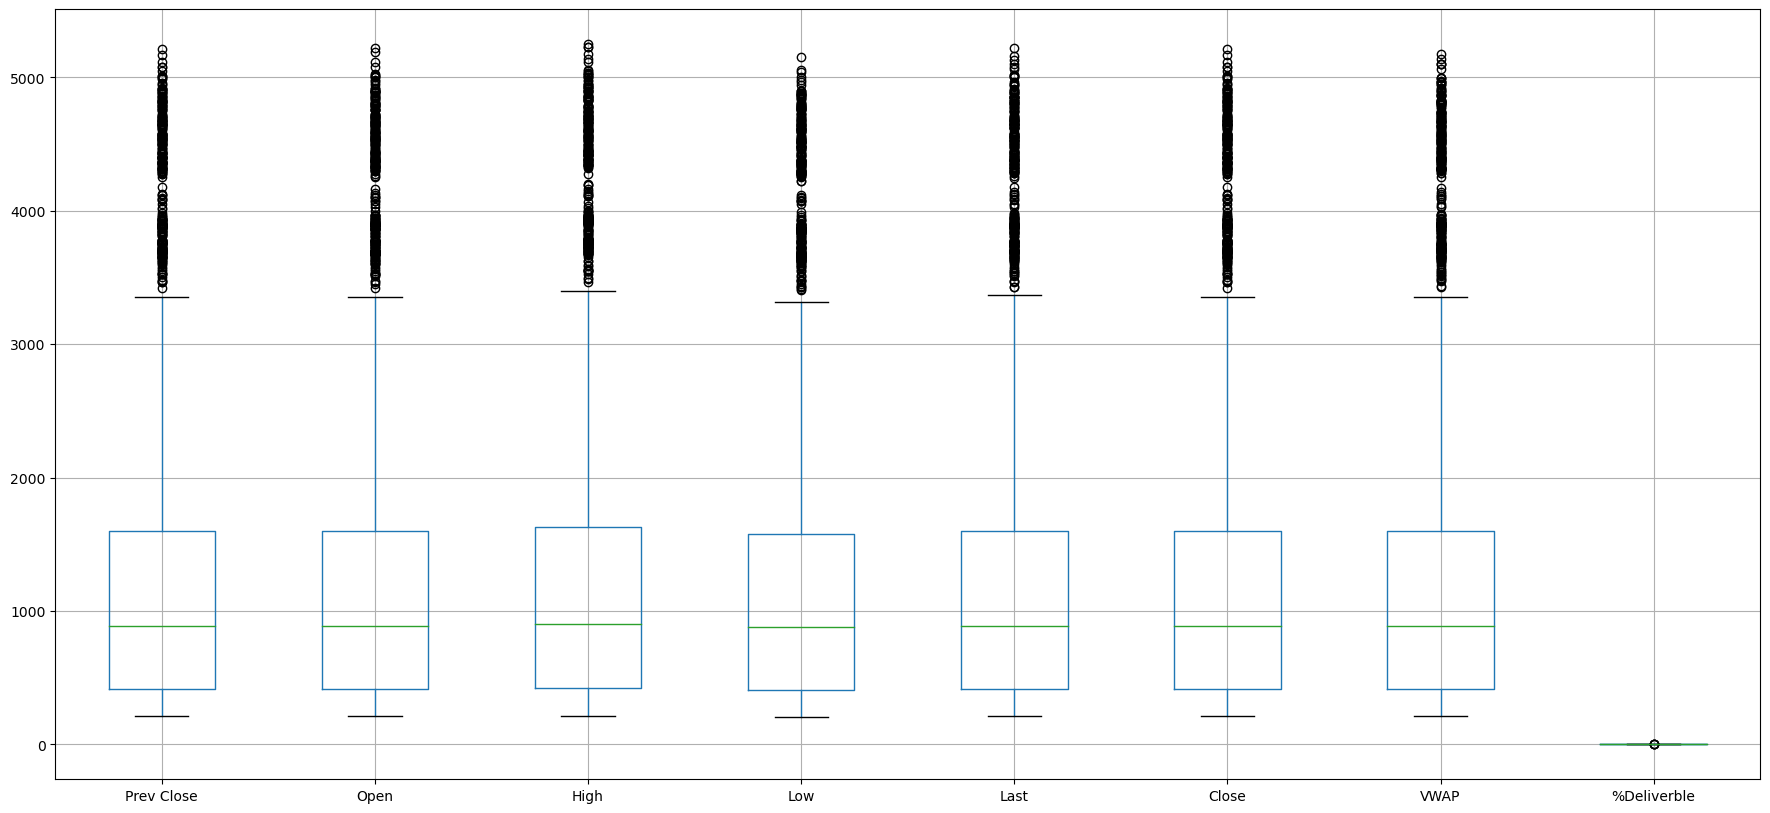

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 10)) 
# Create a boxplot
df.boxplot(column=['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP','%Deliverble'])
plt.show()


# Resloving the outliers

In [18]:
# Define the threshold for capping outliers
threshold = 1 # You can adjust this threshold value as per your requirement
# Define the columns you want to cap outliers for
columns_to_cap = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
# Loop through each column and cap outliers
for column in columns_to_cap:
    # Calculate the mean and standard deviation of the column
    mean = df[column].mean()
    std = df[column].std()
    
    # Calculate the upper and lower bounds for capping outliers
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std
    
    # Cap outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Save the capped dataset
df.to_csv("ASIANPAINT_capped.csv", index=False)


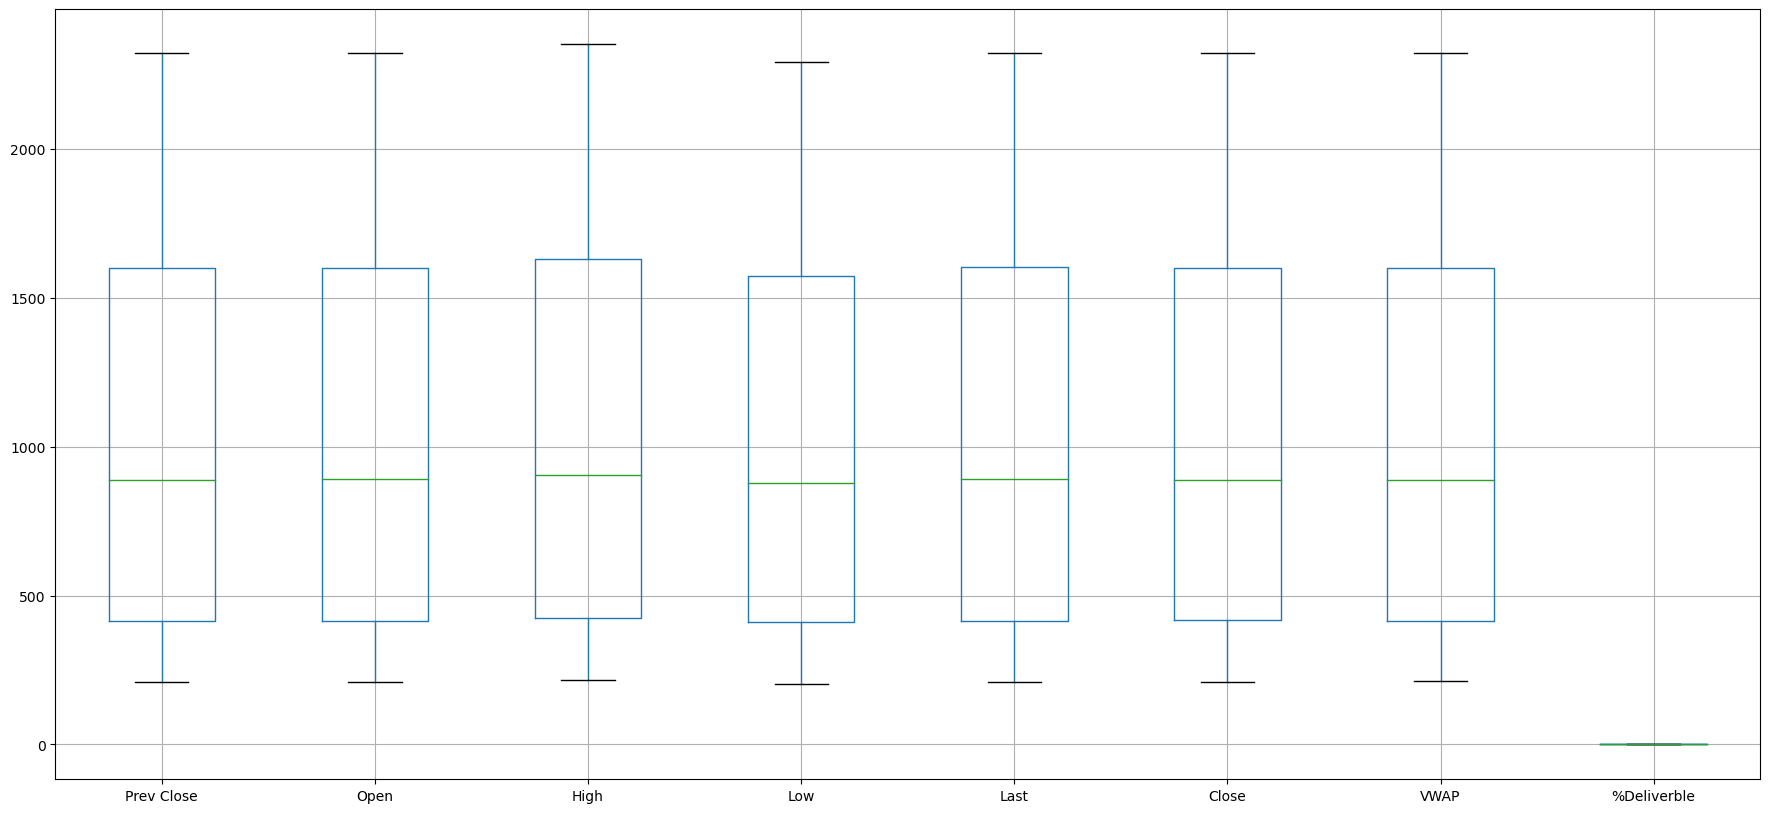

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 10)) 
# Create a boxplot
df.boxplot(column=['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP','%Deliverble'])
plt.show()


# 2. Data Visualization

# we have used some Graphical methods like Histogram, Boxplot, Correlation matrix heatmap and Time series plot


# Histogram

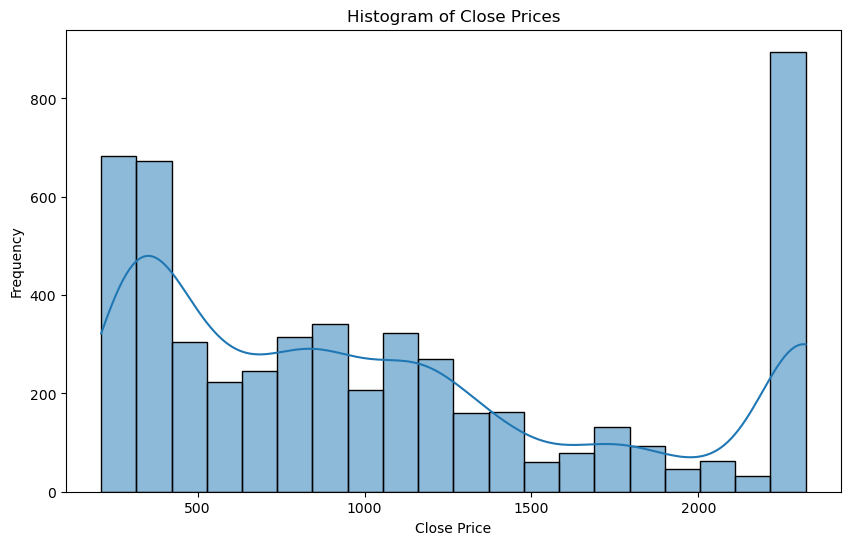

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


#conclusion 

Above histogram shows that the Histogram is skewed rightly 
postiviely skewed


# Density plot

C:\Users\dhruv\AppData\Local\Temp\ipykernel_5296\3687848881.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Close'], shade=True)


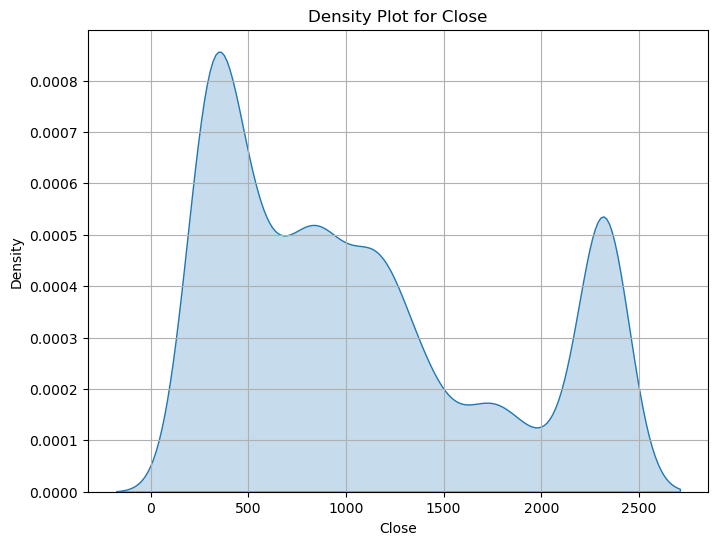

In [21]:
# Create density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Close'], shade=True)
plt.title('Density Plot for {}'.format('Close'))
plt.xlabel('Close')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#conclusion
the Density plot shows the density of the close Price. 
In the plot the close price density between 0 to 1000 is more.  

# boxplot

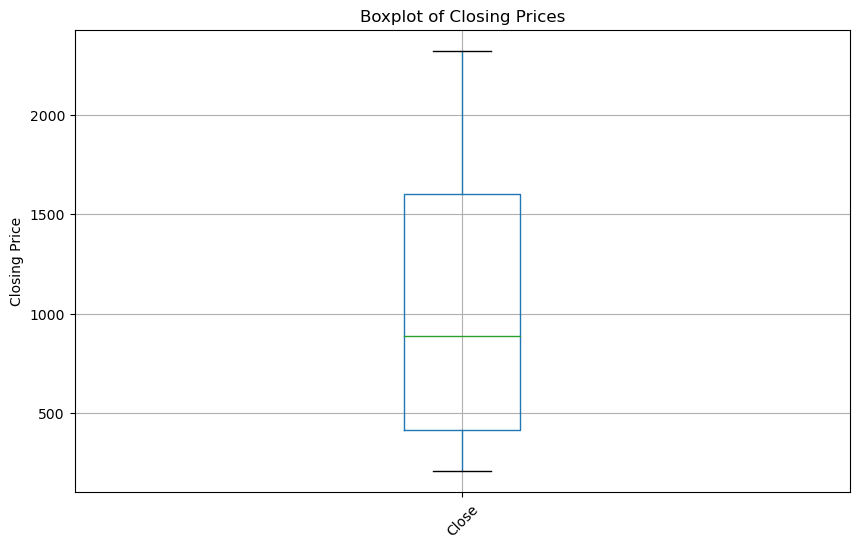

In [22]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Close', figsize=(12, 6))
plt.title('Boxplot of Closing Prices')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#conclusion 
From the above box plot we can see that there are some outliers.
There are outliers from the range of 3400 Close Price.


# Correlation matrix heatmap

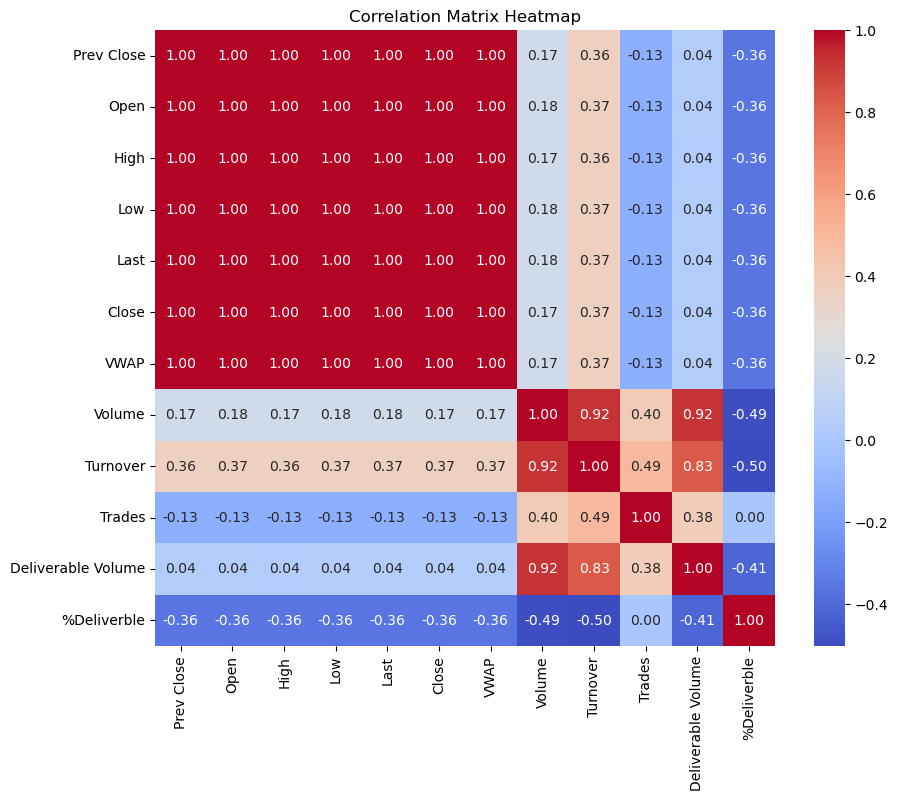

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Time series plot

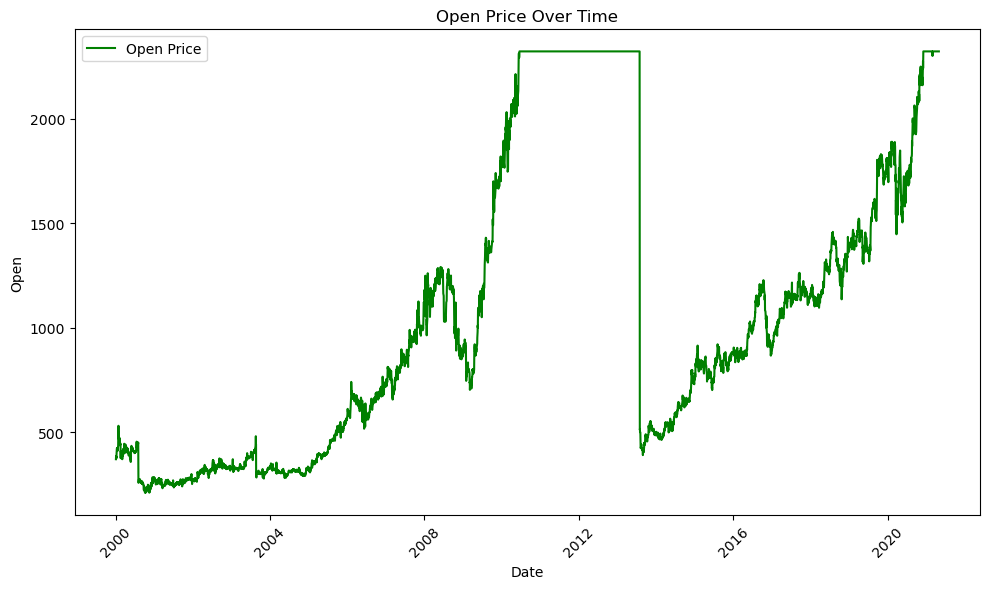

In [24]:
# Plotting Open Price Over Time

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df['Open'], label='Open Price', color='Green')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#conclusion
From the Above Time Series Plot for open price over Time.
from 2000 to 2008 there is a constant growth in open price.
But from 2008 to 2009 the price was slowly droped.
Right from the 2009 there is a rapid increase in open price till 2013.
But Right from 2013 there is danger drop of price.
And then the open price continous kept increasing.

# Plotting Closing Price Over Time

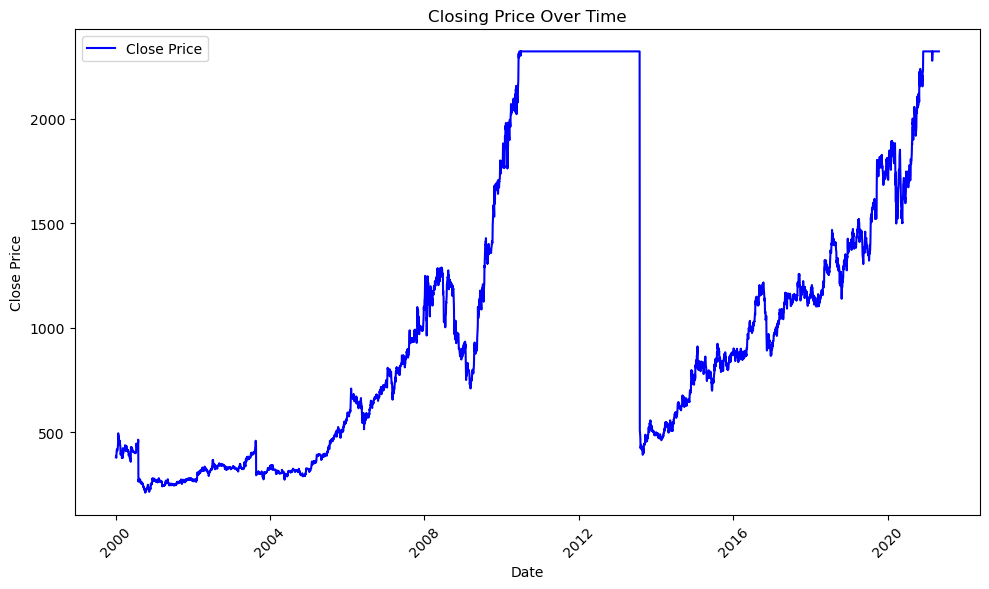

In [25]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel("Date")
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#conclusion
From the Above Time Series Plot for close price over Time.
from 2000 to 2008 there is a constant growth in close price.
But from 2008 to 2009 the price was slowly droped.
Right from the 2009 there is a rapid increase in close price till 2013.
But Right from 2013 there is danger drop of price.
And then the close price continous kept increasing.

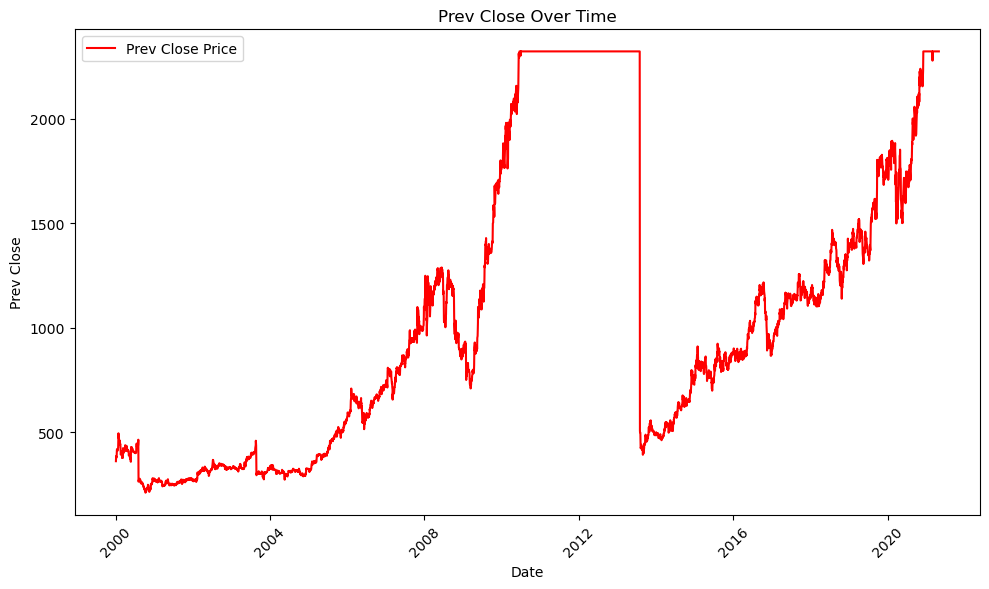

In [26]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(df['Prev Close'], label='Prev Close Price', color='Red')
plt.title('Prev Close Over Time')
plt.xlabel('Date')
plt.ylabel('Prev Close')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#conclusion
From the Above Time Series Plot for prev close over Time.
from 2000 to 2008 there is a constant growth in prev close price.
But from 2008 to 2009 the price was slowly droped.
Right from the 2009 there is a rapid increase in open price till 2013.
But Right from 2013 there is danger drop of price.
And then the prev close price continous kept increasing.

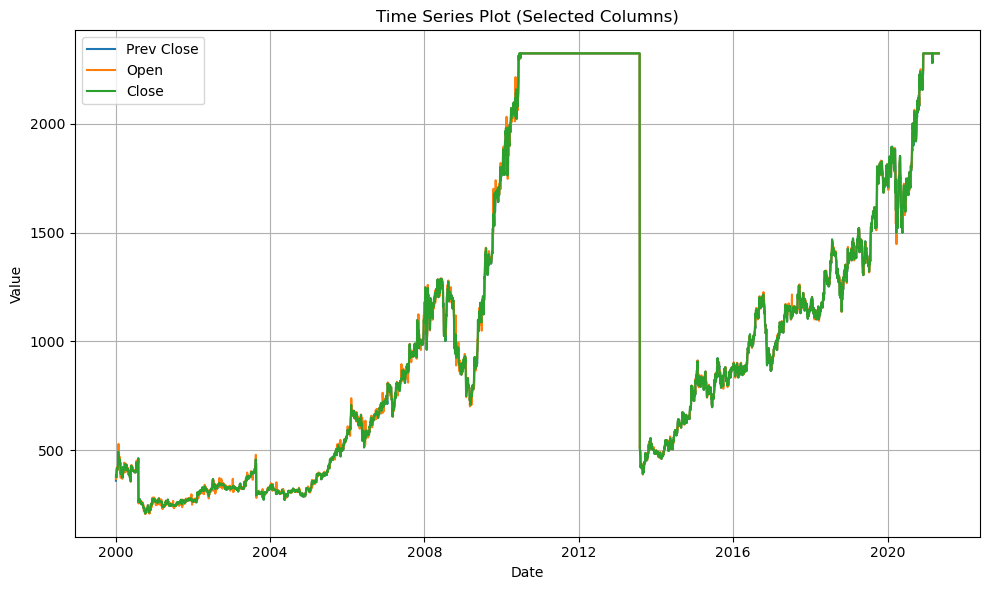

In [27]:
# Filter columns
selected_columns = ['Prev Close', 'Open', 'Close', ]
df_selected = df[selected_columns]

# Plot
plt.figure(figsize=(10, 6))
for col in df_selected.columns:
    plt.plot(df_selected.index, df_selected[col], label=col)

plt.title('Time Series Plot (Selected Columns)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# pair plot

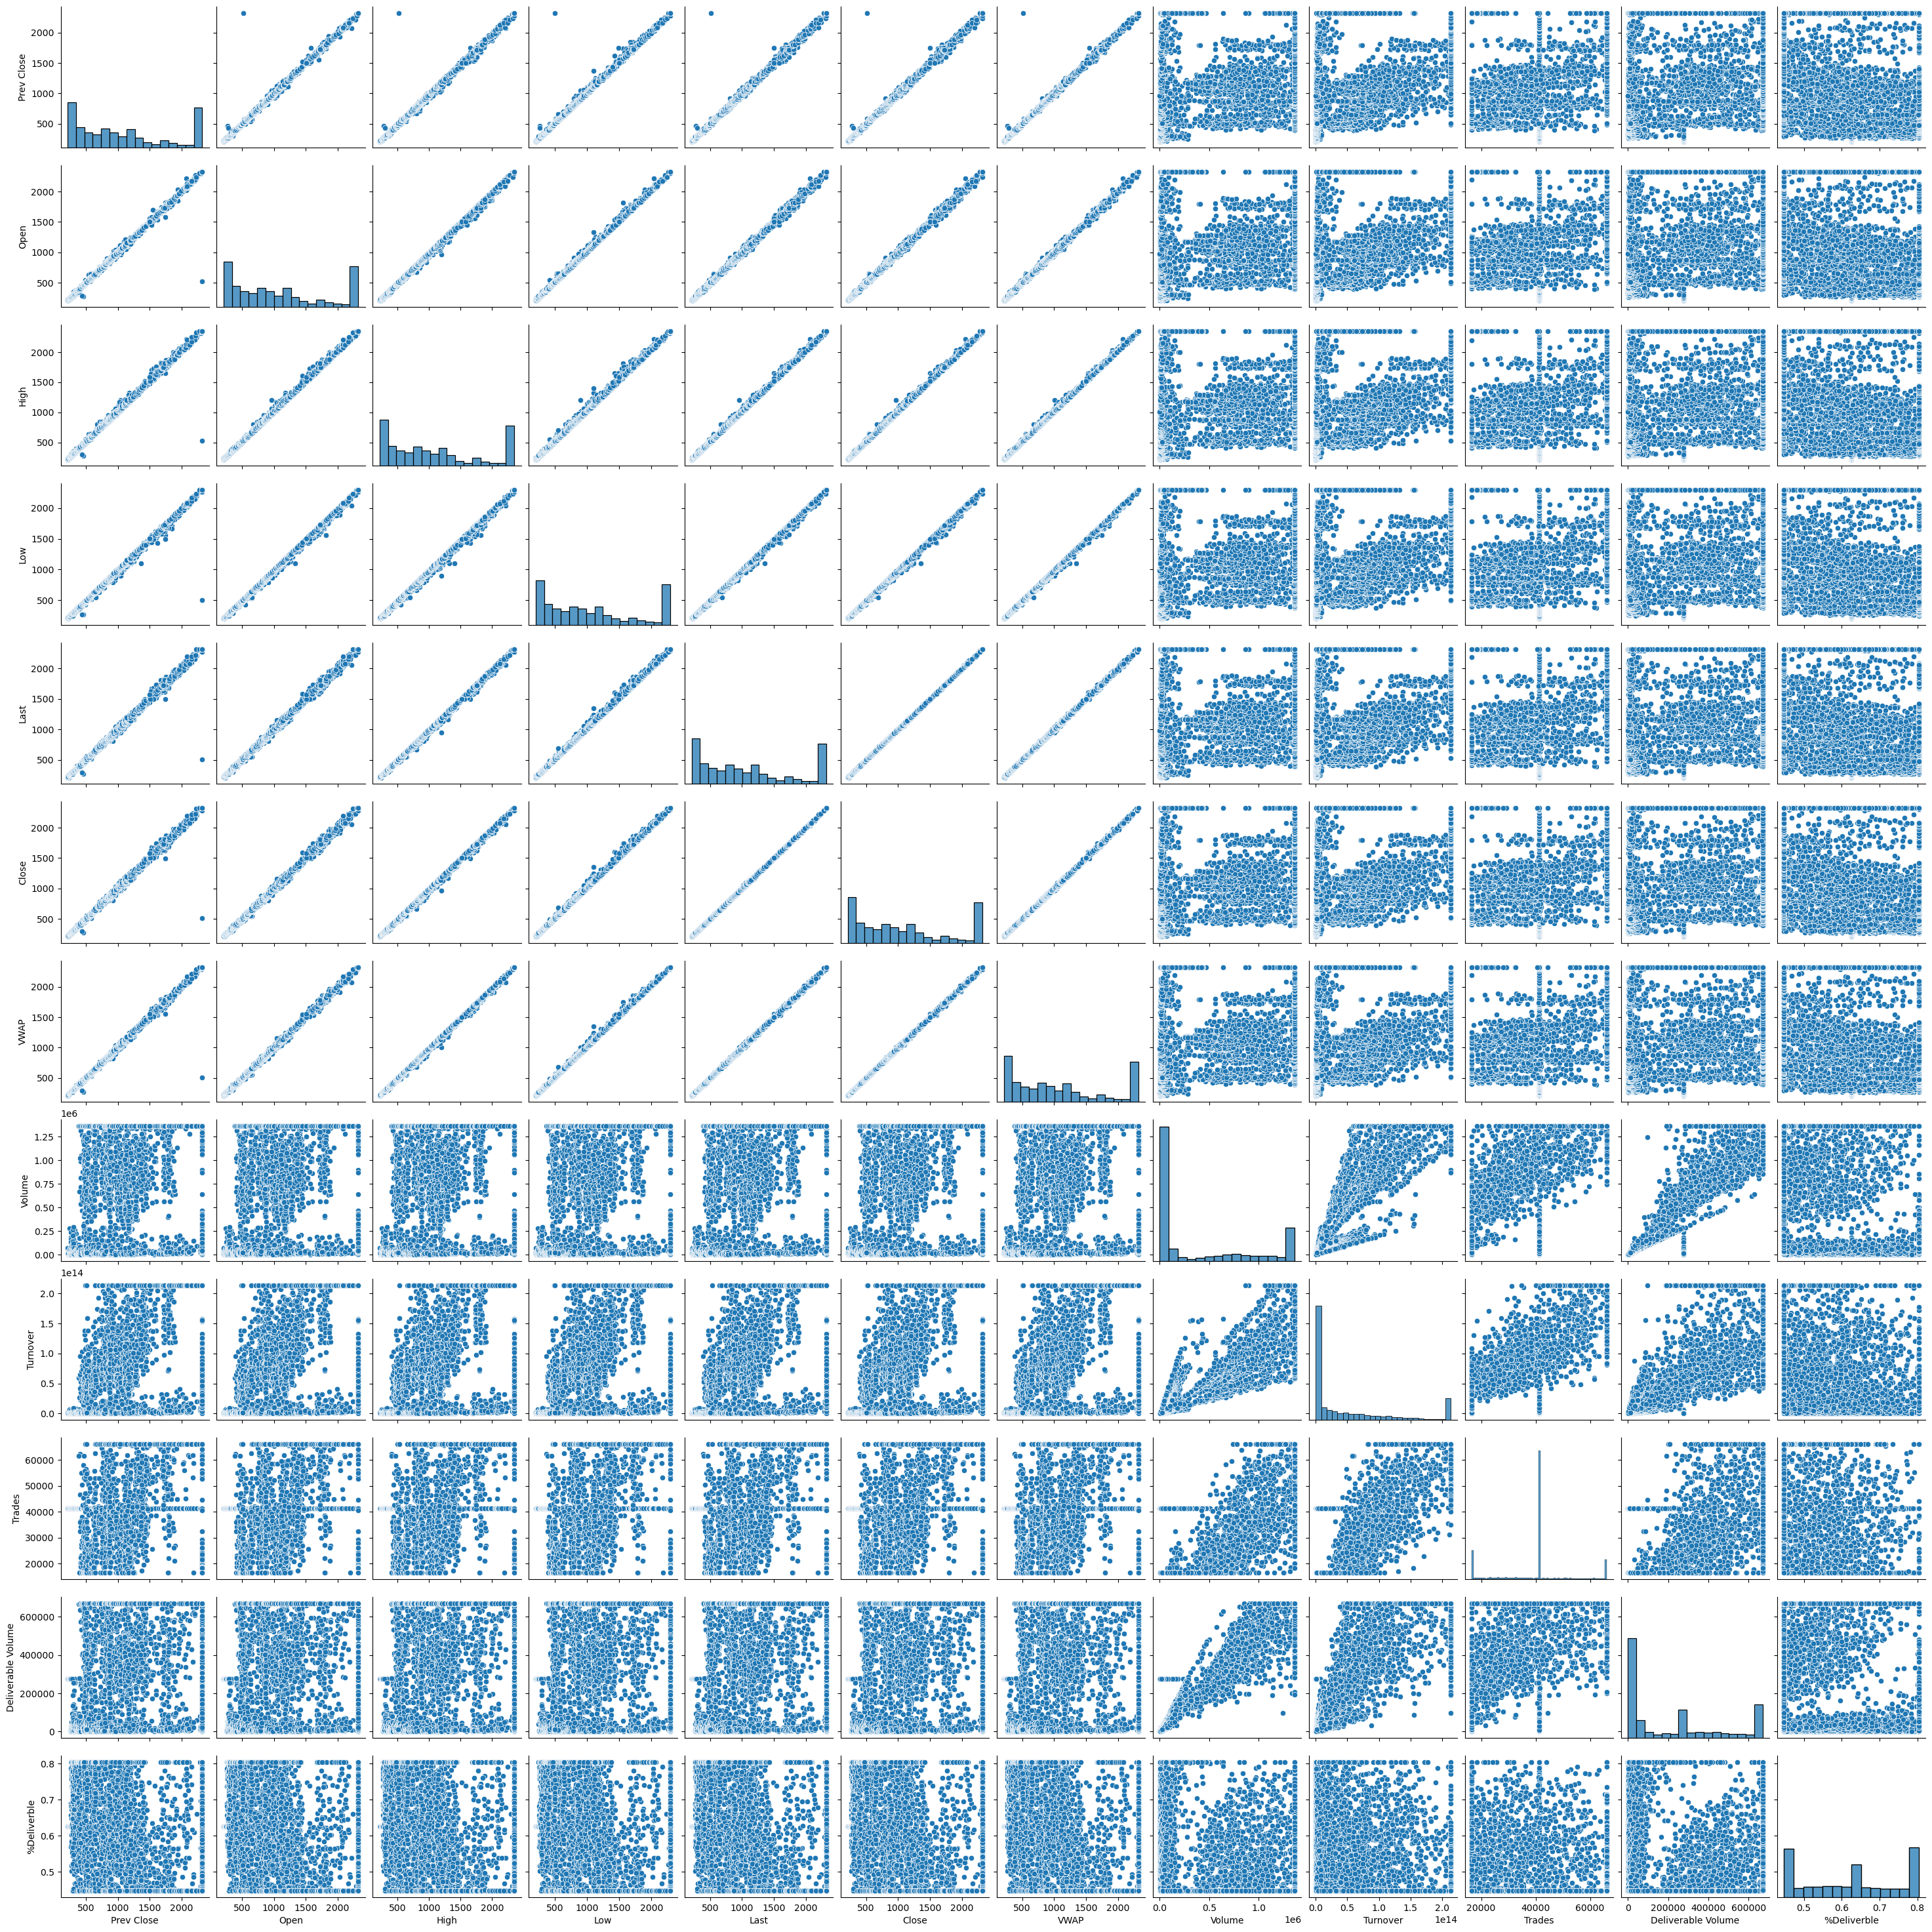

In [28]:
# Drop non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Create pair plot
sns.pairplot(df_numeric)
plt.show()

# Feature Engineering

In [29]:
# Calendar Features
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter

In [30]:
# Price Change Ratios
df['Daily_Return'] = df['Close'].pct_change()
df['Weekly_Return'] = df['Close'].pct_change(periods=5)

In [31]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=30)  # Assuming a seasonal period of 30 days
df['Trend'] = result.trend
df['Seasonal'] = result.seasonal
df['Residual'] = result.resid

In [32]:
# Display the engineered features
print(df.head())

            Prev Close   Open   High    Low   Last   Close    VWAP  Volume  \
Date                                                                         
2000-01-03      361.20  370.0  390.0  370.0  385.0  381.65  380.54  3318.0   
2000-01-04      381.65  380.0  392.0  375.0  390.0  385.55  383.50  4818.0   
2000-01-05      385.55  371.5  390.0  371.5  383.0  383.00  379.81  2628.0   
2000-01-06      383.00  384.9  384.9  374.5  375.1  377.50  379.88  3354.0   
2000-01-07      377.50  376.0  390.0  370.0  389.0  385.70  383.38  9589.0   

                Turnover        Trades  Deliverable Volume  %Deliverble  \
Date                                                                      
2000-01-03  1.262617e+11  41346.011401       275128.103398     0.625572   
2000-01-04  1.847699e+11  41346.011401       275128.103398     0.625572   
2000-01-05  9.981384e+10  41346.011401       275128.103398     0.625572   
2000-01-06  1.274114e+11  41346.011401       275128.103398     0.625572   
200

# Model Building

# ARIMA Model Prediction

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


C:\Users\dhruv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dhruv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dhruv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dhruv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

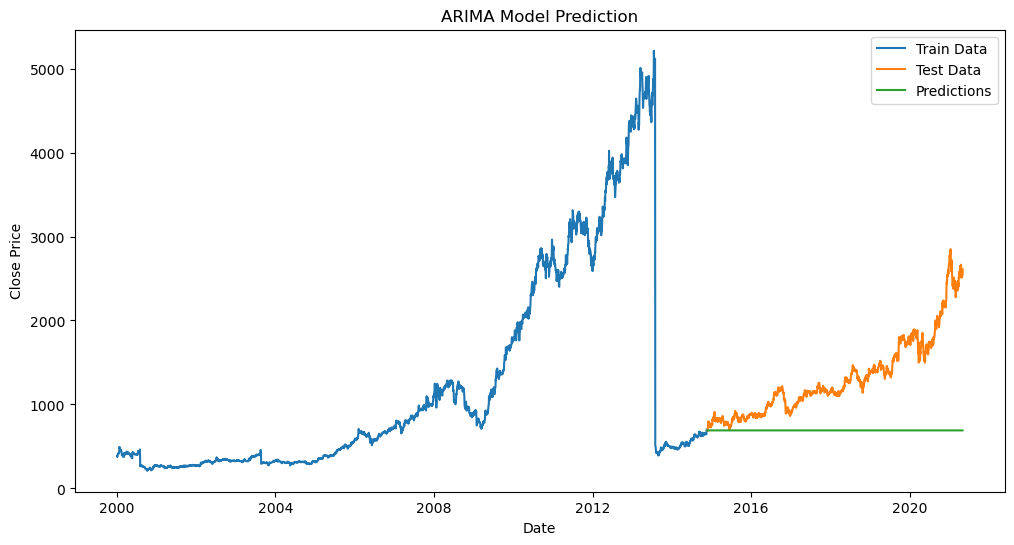

Mean Squared Error (MSE): 620886.3499967518


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_csv("ASIANPAINT.csv", index_col="Date", parse_dates=True)

# Ensure that the column names are correctly spelled and match your dataset
print(df.columns)

# Extracting only the 'Close' column
close_data = df['Close']

# Splitting the data into train and test sets
train_size = int(len(close_data) * 0.7)
train_data = close_data.iloc[:train_size]
test_data = close_data.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Plotting predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Model Prediction')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(test_data, predictions)
print('Mean Squared Error (MSE):', mse)



# Moving Average Forecast

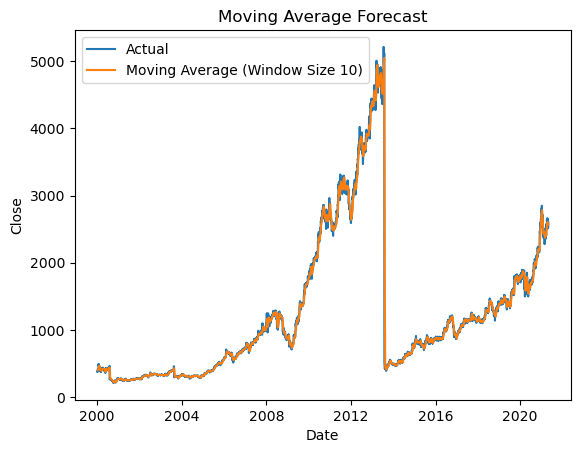

Mean Squared Error (MSE) for Moving Average Forecast: 13189.268429493108


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the window size for the moving average
window_size = 10

# Calculate the moving average
df['MA'] = df['Close'].rolling(window=window_size).mean()

# Plotting
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(df.index, df['MA'], label=f'Moving Average (Window Size {window_size})')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Moving Average Forecast')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error

# Remove rows with NaN values in 'MA' column
df_ma = df.dropna(subset=['MA'])

# Calculate MSE
mse = mean_squared_error(df_ma['Close'], df_ma['MA'])
print('Mean Squared Error (MSE) for Moving Average Forecast:', mse)


# LSTM Forecast

C:\Users\dhruv\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0229 - val_loss: 9.4450e-05
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8095e-04 - val_loss: 3.8303e-05
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1627e-04 - val_loss: 3.8311e-05
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.7092e-04 - val_loss: 2.4588e-05
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3584e-04 - val_loss: 4.7792e-05
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8373e-04 - val_loss: 2.4489e-04
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9041e-04 - val_loss: 3.4904e-05
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7751e-04 - val_loss: 6.8956e-05
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6225e-04 - val_loss: 3.2934e-05
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3773e-04 - val_loss: 6.6393e-05
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3

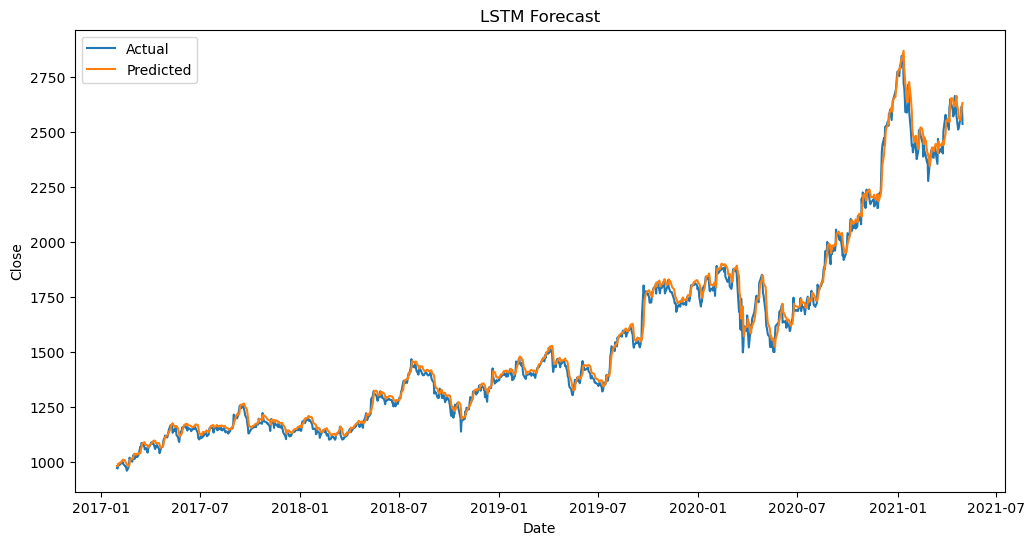

Mean Squared Error (MSE): 1155.7622870719374
Mean Absolute Error (MAE): 24.25165553800056
Root Mean Squared Error (RMSE): 33.99650404191492


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Define function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Set sequence length and split data into train and test sets
sequence_length = 10
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for training
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size+sequence_length:], y_test_inv, label='Actual')
plt.plot(df.index[train_size+sequence_length:], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('LSTM Forecast')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error

# Assuming 'predictions' and 'y_test_inv' contain predicted and actual values respectively

# Calculate MSE
mse = mean_squared_error(y_test_inv, predictions)
print('Mean Squared Error (MSE):', mse)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inv, predictions)
print('Mean Absolute Error (MAE):', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions))
print('Root Mean Squared Error (RMSE):', rmse)

# Simple Exponential Smoothing Forecast(SES)

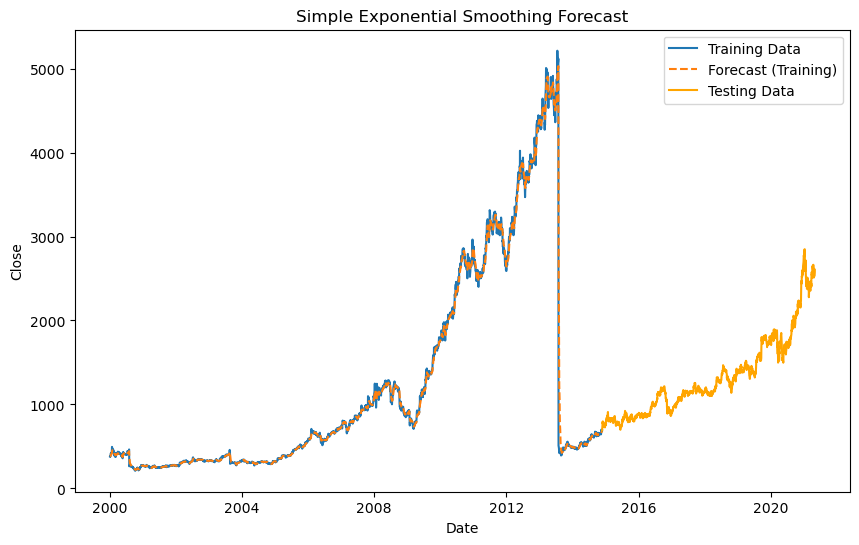

Mean Squared Error (MSE): 17443.111317524537


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the smoothing parameter
alpha = 0.2

# Split data into training and testing sets
train_size = int(0.7 * len(df))  # 80% for training, 20% for testing
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Simple Exponential Smoothing implementation
def simple_exponential_smoothing(series, alpha):
    """
    Perform Simple Exponential Smoothing forecast.
    
    Args:
    - series: Time series data as a pandas Series.
    - alpha: Smoothing parameter (0 < alpha < 1).
    
    Returns:
    - Forecasted values as a numpy array.
    """
    forecasts = [series.iloc[0]]  # Initial forecast is the first observation
    for i in range(1, len(series)):
        forecast = alpha * series.iloc[i] + (1 - alpha) * forecasts[-1]
        forecasts.append(forecast)
    return np.array(forecasts)

# Calculate forecast using Simple Exponential Smoothing on the training data
forecast_train = simple_exponential_smoothing(train_data['Close'], alpha)

# Plotting
plt.figure(figsize=(10, 6))

# Plot training data and forecasted values
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(train_data.index, forecast_train, label='Forecast (Training)', linestyle='--')

# Plot testing data
plt.plot(test_data.index, test_data['Close'], label='Testing Data', color='orange')

# Plot legend and labels
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(train_data['Close'][1:], forecast_train[:-1])
print('Mean Squared Error (MSE):', mse)


We conclude that comparing with all models LSTM is giving low MSE value.So we choose the LSTM for model deployment.